In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [3]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.experience.fillna("zero",inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
import math
mid = math.floor(df['test_score(out of 10)'].mean())
mid

7

In [6]:
df['test_score(out of 10)'].fillna(mid, inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [7]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [8]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [9]:
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [10]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [11]:
reg.intercept_

14992.65144669314

In [12]:
reg.predict([[2,9,6]])

C:\Users\u1904\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [13]:
reg.predict([[12,10,10]])

C:\Users\u1904\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

but how do i plot?

why not linear?

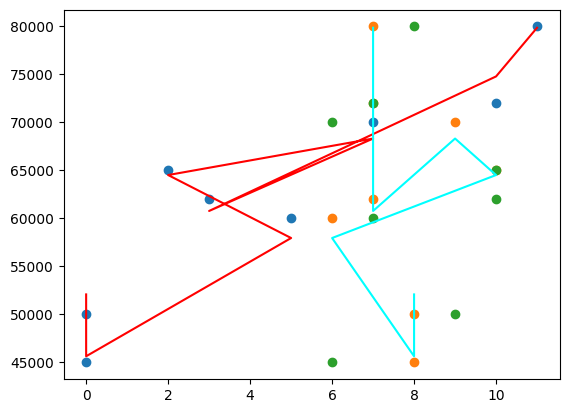

In [29]:
%matplotlib inline
plt.scatter(df.experience,df['salary($)'])
plt.scatter(df['test_score(out of 10)'],df['salary($)'])
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])
plt.plot(df.experience,reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color='r')
plt.plot(df['test_score(out of 10)'],reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color='cyan')
